In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import discopy.util as util
# import discopy.plot as plot
# import discopy.geom as geom
from pathlib import Path

Matplotlib is building the font cache; this may take a moment.


In [2]:
path = '/gpfs/hsu/BH_disco_runs/cb_test_0/report.dat'
dat = np.loadtxt(path)

In [9]:
dat[:,0].shape

(101,)

In [10]:
t = dat[:,0]
mass = dat[:,1]
energy = dat[:,2]
radial_momentum = dat[:,3]
angular_momentum = dat[:,4]
vertical_momentum = dat[:,5]
passive_scalar = dat[:,6]
M1 = dat[:,7]
M2 = dat[:,8]
r1 = dat[:,9]
r2 = dat[:,10]
phi1 = dat[:,11]
phi2 = dat[:,12]
dM1 = dat[:,13]
dM2 = dat[:,14]
dJz_grv1 = dat[:,15]
dJz_grv2 = dat[:,16]
dJz_snk1 = dat[:,17]
dJz_snk2 = dat[:,18]


/tmp/ipykernel_15144/2183455718.py:2: RuntimeWarning: invalid value encountered in divide
  ax.plot(t, dJz_snk1/t, label='dJz_snk1')
/tmp/ipykernel_15144/2183455718.py:3: RuntimeWarning: invalid value encountered in divide
  ax.plot(t, dJz_snk2/t, label='dJz_snk2')


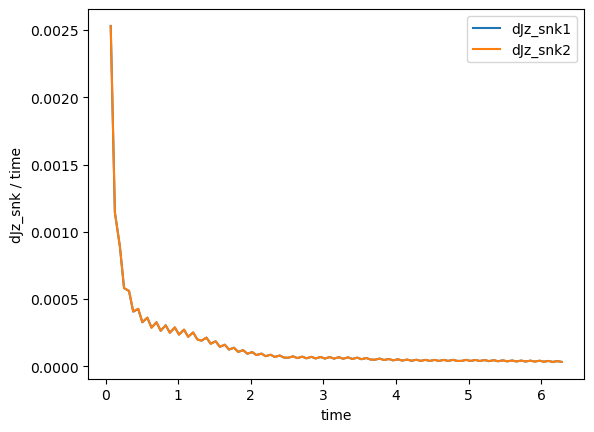

In [33]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, dJz_snk1/t, label='dJz_snk1')
ax.plot(t, dJz_snk2/t, label='dJz_snk2')
# ax.set_ylim(0, 0.5)
ax.set_ylabel('dJz_snk / time')
ax.set_xlabel('time')
fig.savefig('dJz_snk')
plt.legend()
plt.show()
# plt.close(fig) #delete figure from memory